In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

x_data = np.array([
    [2,1],
    [3,2],
    [3,4],
    [5,5],
    [7,5],
    [2,5],
    [8,9],
    [9,10],
    [6,12],
    [9,2],
    [6,10],
    [2,4]
])
y_data = np.array([0,0,1,1,1,0,1,1,1,1,1,0])

labels = ['fail','pass']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=2)

In [26]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("before_accuracy",metrics.accuracy_score(y_test,y_pred))

before_accuracy 0.6666666666666666


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       0.00      0.00      0.00         1
      class1       0.67      1.00      0.80         2

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



model = LogisticRegression() 은 iteration기본값이 100인데, 만일 run했을 때 lbfgs failed to converge (status=1) 라는 WARNING이 뜨면 최적화 iteration으로 접근하기 위한 iteration이 부족하다는 의미이니까 (너무 신경은 쓰지말고 = 답은 나오니까) 
max_iter = 5000(대충 큰수,,) 옵션을 넣어주면 WARNING을 없앨 수 있다. 

In [29]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

model = LogisticRegression(max_iter=5000)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.3, random_state = 42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("before_accuracy", metrics.accuracy_score(y_test,y_pred))

before_accuracy 0.9766081871345029


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=['class0','class1']))
y_test = y_test.tolist()
print(y_test.count(1))

              precision    recall  f1-score   support

      class0       0.97      0.97      0.97        63
      class1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

108


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.3, random_state = 42)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("StandardScaler_accuracy", metrics.accuracy_score(y_test, y_pred))

StandardScaler_accuracy 0.9766081871345029


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.3, random_state = 42)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MinMaxScaler_accuracy", metrics.accuracy_score(y_test, y_pred))

MinMaxScaler_accuracy 0.9766081871345029


In [16]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.3, random_state = 42)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MaxAbsScaler_accuracy", metrics.accuracy_score(y_test, y_pred))

MaxAbsScaler_accuracy 0.9766081871345029


In [17]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
data_scaled = scaler.fit_transform(cancer.data)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.3, random_state = 42)

model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("RobustScaler_accuracy", metrics.accuracy_score(y_test, y_pred))

RobustScaler_accuracy 0.9766081871345029


[[4 1]
 [2 3]]


<function matplotlib.pyplot.show(*args, **kw)>

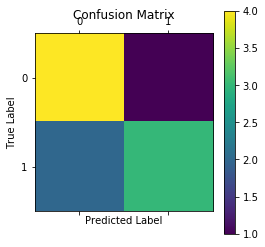

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_test = [0,0,0,0,0,1,1,1,1,1]
y_pred = [0,1,0,0,0,0,0,1,1,1]
confusion_matrix = confusion_matrix(y_test,y_pred) # yes=0 // no=1
print(confusion_matrix)

plt.matshow(confusion_matrix)
plt.title('Confusion Matrix')
plt.colorbar()

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show